# Credit Score Classification – Exploratory Data Analysis (EDA)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
# %matplotlib notebook
plt.rcParams["figure.figsize"] = (12, 6)
# plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")
import warnings

warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
df = pd.read_csv("./train.csv") # reading train data
df.head()

ID Customer_ID     Month           Name   Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265  Scientist   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0      19114.12               1824.843                  3  ...           _   
1      19114.12                    NaN                  3  ...        Good   
2      19114.12                    NaN                  3  ...        Good   
3      19114.12                    NaN                  3  ...        Good   
4      19114.12               1824.843                  3  ...        Good   

   Outstanding_Debt Credit_Utilization_Ratio     Credit_History_Age  \
0            809.98                   26.823  22 Years and 1 Months   
1            809.98                   31.945                    NaN   
2            809.98                   28.609  22 Years and 3 Months   
3            809.98                   31.378  22 Years and 4 Months   
4            809.98                   24.797  22 Years and 5 Months   

   Payment_of_Min_Amount Total_EMI_per_month Amount_invested_monthly  \
0                     No              49.575       80.41529543900253   
1                     No              49.575      118.28022162236736   
2                     No              49.575         81.699521264648   
3                     No              49.575       199.4580743910713   
4                     No              49.575      41.420153086217326   

                  Payment_Behaviour     Monthly_Balance Credit_Score  
0   High_spent_Small_value_payments  312.49408867943663         Good  
1    Low_spent_Large_value_payments  284.62916249607184         Good  
2   Low_spent_Medium_value_payments   331.2098628537912         Good  
3    Low_spent_Small_value_payments  223.45130972736786         Good  
4  High_spent_Medium_value_payments  341.48923103222177         Good  

[5 rows x 28 columns]

In [4]:
# Duplicate check
def duplicate_values(df):
    print("Duplicate check...")
    num_duplicates = df.duplicated(subset=None, keep='first').sum()
    if num_duplicates > 0:
        print("There are", num_duplicates, "duplicated observations in the dataset.")
        df.drop_duplicates(keep='first', inplace=True)
        print(num_duplicates, "duplicates were dropped!")
        print("No more duplicate rows!")
    else:
        print("There are no duplicated observations in the dataset.")
        
duplicate_values(df)

Duplicate check...
There are no duplicated observations in the dataset.


In [5]:
df = df.drop(['ID','Customer_ID','Month','Name','SSN', 'Type_of_Loan', 'Changed_Credit_Limit', 'Monthly_Inhand_Salary'], axis = 1)

In [6]:
target_mapping = {'Poor': 0, 'Standard': 1, 'Good': 2}

# Map the target variable using the defined mapping
df['Credit_Score'] = df['Credit_Score'].map(target_mapping)

In [7]:
df = df.replace("_", "", regex=True)
df[df.eq('').any(axis=1)] 

Age Occupation Annual_Income  Num_Bank_Accounts  Num_Credit_Card  \
0      23  Scientist      19114.12                  3                4   
8      28                 34847.84                  2                4   
10     28    Teacher      34847.84                  2             1385   
16     34                143162.64                  1                5   
18     34                143162.64                  1                5   
...    ..        ...           ...                ...              ...   
99989  28                 20002.88                 10                8   
99992  24   Mechanic      39628.99                  4                6   
99994  25   Mechanic      39628.99                  4                6   
99995  25   Mechanic      39628.99                  4                6   
99996  25   Mechanic      39628.99                  4                6   

       Interest_Rate Num_of_Loan  Delay_from_due_date Num_of_Delayed_Payment  \
0                  3           4                    3                      7   
8                  6           1                    3                      4   
10                 6           1                    3                     -1   
16                 8           3                    5                      8   
18                 8           3                    8                      7   
...              ...         ...                  ...                    ...   
99989             29           5                   33                     25   
99992              7           2                   23                    NaN   
99994              7           2                   20                      6   
99995              7           2                   23                      7   
99996              7           2                   18                      7   

       Num_Credit_Inquiries Credit_Mix Outstanding_Debt  \
0                     4.000                      809.98   
8                     2.000       Good           605.03   
10                    2.000                      605.03   
16                    3.000       Good          1303.01   
18                      NaN       Good          1303.01   
...                     ...        ...              ...   
99989                 9.000        Bad           3571.7   
99992                 3.000                      502.38   
99994                 3.000                      502.38   
99995                 3.000                      502.38   
99996                 3.000                      502.38   

       Credit_Utilization_Ratio      Credit_History_Age Payment_of_Min_Amount  \
0                        26.823   22 Years and 1 Months                    No   
8                        24.464   26 Years and 7 Months                    No   
10                       33.225   26 Years and 9 Months                    No   
16                       28.617   17 Years and 9 Months                    No   
18                       26.520  17 Years and 11 Months                    No   
...                         ...                     ...                   ...   
99989                    33.360    6 Years and 1 Months                   Yes   
99992                    32.991   31 Years and 3 Months                    No   
99994                    39.324   31 Years and 5 Months                    No   
99995                    34.664   31 Years and 6 Months                    No   
99996                    40.566   31 Years and 7 Months                    No   

       Total_EMI_per_month Amount_invested_monthly  \
0                   49.575       80.41529543900253   
8                   18.816        104.291825168246   
10                  18.816       58.51597569589465   
16                 246.992        168.413702679309   
18                 246.992                   10000   
...                    ...                     ...   
99989               60.965       74.36660309585342   
99992               35.104       401.19648

In [8]:
rows_with_empty_values = df[df.eq('').any(axis=1)]

# Fill empty values with np.nan in selected rows
df.loc[rows_with_empty_values.index] = df.loc[rows_with_empty_values.index].replace('', np.nan)

In [ ]:
df.head()

Age Occupation Annual_Income  Num_Bank_Accounts  Num_Credit_Card  \
0    23  Scientist      19114.12                  3                4   
1    23  Scientist      19114.12                  3                4   
2  -500  Scientist      19114.12                  3                4   
3    23  Scientist      19114.12                  3                4   
4    23  Scientist      19114.12                  3                4   

   Interest_Rate Num_of_Loan  Delay_from_due_date Num_of_Delayed_Payment  \
0              3           4                    3                      7   
1              3           4                   -1                    NaN   
2              3           4                    3                      7   
3              3           4                    5                      4   
4              3           4                    6                    NaN   

   Num_Credit_Inquiries Credit_Mix Outstanding_Debt  Credit_Utilization_Ratio  \
0                 4.000        NaN           809.98                    26.823   
1                 4.000       Good           809.98                    31.945   
2                 4.000       Good           809.98                    28.609   
3                 4.000       Good           809.98                    31.378   
4                 4.000       Good           809.98                    24.797   

      Credit_History_Age Payment_of_Min_Amount  Total_EMI_per_month  \
0  22 Years and 1 Months                    No               49.575   
1                    NaN                    No               49.575   
2  22 Years and 3 Months                    No               49.575   
3  22 Years and 4 Months                    No               49.575   
4  22 Years and 5 Months                    No               49.575   

  Amount_invested_monthly             Payment_Behaviour     Monthly_Balance  \
0       80.41529543900253   HighspentSmallvaluepayments  312.49408867943663   
1      118.28022162236736    LowspentLargevaluepayments  284.62916249607184   
2         81.699521264648   LowspentMediumvaluepayments   331.2098628537912   
3       199.4580743910713    LowspentSmallvaluepayments  223.45130972736786   
4      41.420153086217326  HighspentMediumvaluepayments  341.48923103222177   

   Credit_Score  
0             2  
1             2  
2             2  
3             2  
4             2

In [10]:
df.describe().T


count     mean      std    min    25%    50%  \
Num_Bank_Accounts        100000.000   17.091  117.405 -1.000  3.000  6.000   
Num_Credit_Card          100000.000   22.474  129.057  0.000  4.000  5.000   
Interest_Rate            100000.000   72.466  466.423  1.000  8.000 13.000   
Delay_from_due_date      100000.000   21.069   14.860 -5.000 10.000 18.000   
Num_Credit_Inquiries      98035.000   27.754  193.177  0.000  3.000  6.000   
Credit_Utilization_Ratio 100000.000   32.285    5.117 20.000 28.053 32.306   
Total_EMI_per_month      100000.000 1403.118 8306.041  0.000 30.307 69.249   
Credit_Score             100000.000    0.888    0.675  0.000  0.000  1.000   

                             75%       max  
Num_Bank_Accounts          7.000  1798.000  
Num_Credit_Card            7.000  1499.000  
Interest_Rate             20.000  5797.000  
Delay_from_due_date       28.000    67.000  
Num_Credit_Inquiries       9.000  2597.000  
Credit_Utilization_Ratio  36.497    50.000  
Total_EMI_per_month      161.224 82331.000  
Credit_Score               1.000     2.000

In [11]:
df.describe(include='object').T


count unique                           top   freq
Age                      100000   1728                            38   2994
Occupation                92938     15                        Lawyer   6575
Annual_Income            100000  13487                      17273.83     16
Num_of_Loan              100000    414                             3  15104
Num_of_Delayed_Payment    92998    711                            19   5481
Credit_Mix                79805      3                      Standard  36479
Outstanding_Debt         100000  12203                        1151.7     24
Credit_History_Age        90970    404        15 Years and 11 Months    446
Payment_of_Min_Amount    100000      3                           Yes  52326
Amount_invested_monthly   95521  91049                         10000   4305
Payment_Behaviour        100000      7    LowspentSmallvaluepayments  25513
Monthly_Balance           98800  98792  -333333333333333333333333333      9

In [13]:
df.Age.nunique()


1728

In [12]:
df.Age.value_counts(ascending=False).head(10)


Age
38    2994
28    2968
31    2955
26    2945
32    2884
36    2868
35    2866
25    2861
27    2859
39    2846
Name: count, dtype: int64

In [14]:
import re

def non_numeric_values(df, column_name):
    # Define a regular expression pattern to match numeric characters
    pattern = r'\D+'
    
    # Find non-numeric values using regular expression
    non_numeric_values = df[column_name].astype(str).str.findall(pattern)
    
    # Flatten the list of lists
    non_numeric_values = [item for sublist in non_numeric_values for item in sublist]
    
    # Use set to ensure uniqueness
    unique_non_numeric_values = set(non_numeric_values)
    
    return unique_non_numeric_values

unique_non_numeric = non_numeric_values(df, 'Age')
print(unique_non_numeric)

{'-'}


In [15]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df[df['Age'] < 0]['Age'].unique()

array([-500])

In [16]:
df[df['Age'] > 100]['Age'].unique()

array([7580,  181,  995, ..., 4808, 2263, 1342], shape=(1681,))

In [17]:
df.drop(df[df['Age'] > 100].index, inplace = True)
df.drop(df[df['Age'] < 0].index, inplace = True)

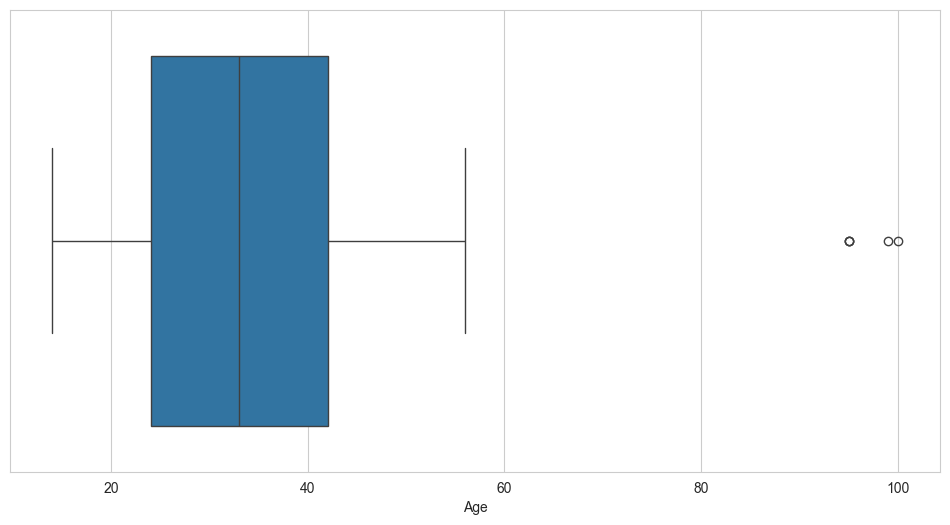

In [18]:
sns.boxplot(data= df, x= df.Age);


In [19]:
df.Occupation.value_counts()


Occupation
Lawyer          6389
Architect       6175
Engineer        6172
Scientist       6113
Accountant      6110
Mechanic        6099
MediaManager    6068
Teacher         6049
Developer       6031
Entrepreneur    6015
Doctor          5916
Journalist      5906
Manager         5807
Musician        5760
Writer          5741
Name: count, dtype: int64

In [20]:
df.Occupation.isna().sum()

np.int64(6873)

In [21]:
df.loc[pd.isna(df['Occupation']), 'Occupation'] = 'Other'


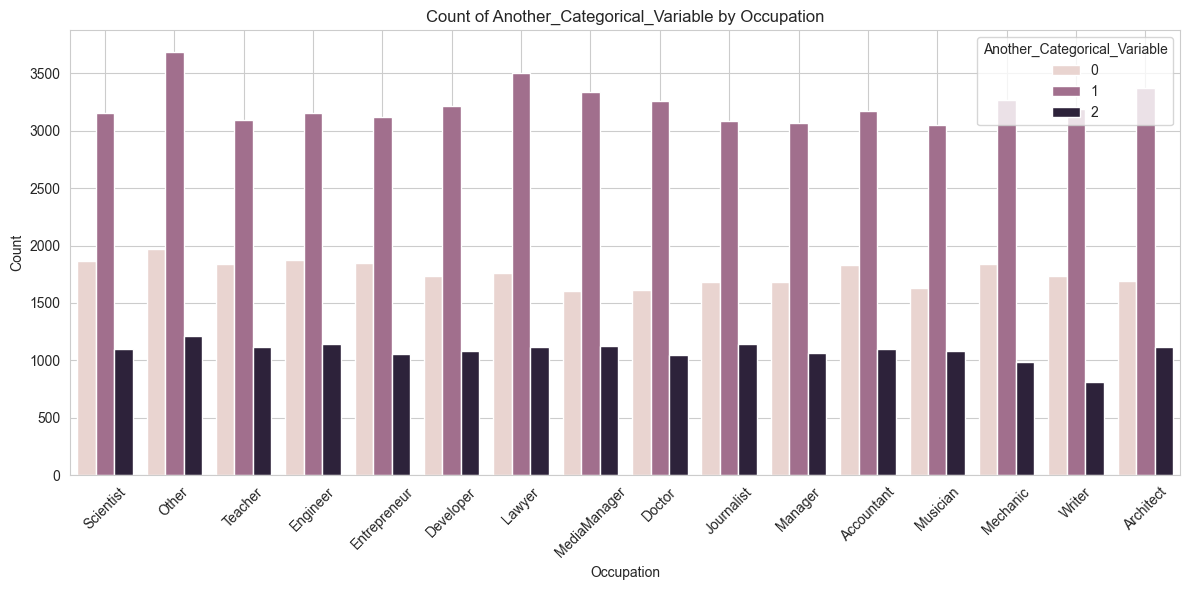

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.countplot(x='Occupation', hue='Credit_Score', data=df)
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Count of Another_Categorical_Variable by Occupation')
plt.xticks(rotation=45)
plt.legend(title='Another_Categorical_Variable')
plt.grid(True)
plt.tight_layout()
plt.show()

In [23]:
non_numeric_values(df, 'Num_Bank_Accounts')


{'-'}

In [24]:
df[df.Num_Bank_Accounts < 0]['Num_Bank_Accounts'].count()


np.int64(21)

In [25]:
df.drop(df[df['Num_Bank_Accounts'] < 0].index, inplace=True)


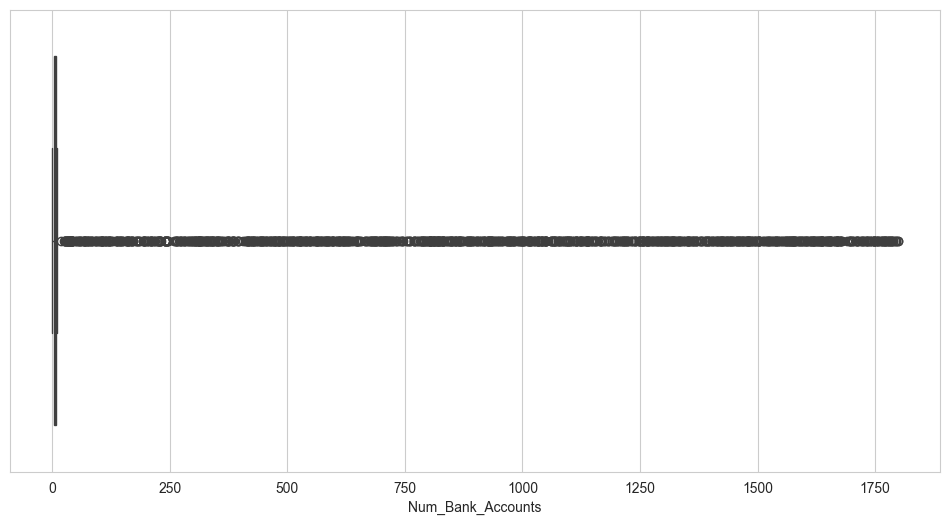

In [26]:
sns.boxplot(data= df, x = df.Num_Bank_Accounts);


In [27]:
non_numeric_values(df, 'Num_of_Loan')


{'-'}

In [28]:
df['Num_of_Loan'] = pd.to_numeric(df['Num_of_Loan'], errors='coerce')
df[df['Num_of_Loan'] < 0]['Num_of_Loan'].unique()

array([-100])

In [29]:
df['Num_of_Loan'].unique()

array([   4,    1,    3,  967, -100,    0,    2,    7,    5,    6,    8,
          9, 1464,  622,  352, 1017,  945,  146,  563,  341,  720, 1485,
         49,  737, 1106,  466,  728,  313,  597,  119,  663,  640,   92,
       1019,  501, 1302,   39,  716,  848,  931, 1214,  186,  424, 1001,
       1110, 1152,  457, 1433, 1187,   52, 1480, 1047, 1035, 1347,   33,
        193,  699,  329, 1451,  484,  649,  995,  545,  684, 1135, 1094,
       1204,  654,   58,  348,  614, 1363,  323, 1406, 1348,  430,  153,
       1461,  905, 1312, 1424, 1154,   95, 1353, 1228,  819, 1006,  795,
        359, 1209,  590,  696, 1185, 1465,  911,   70,  816, 1369,  143,
       1416,  455,   55, 1096, 1474,  420,  904,   89, 1259,  527, 1241,
        449,  983,  418,  319,   23,  238,  638,  138,  235,  280, 1070,
       1484,  274,  494, 1459,  404, 1354, 1495, 1391,  601, 1313, 1319,
        898,  231,  752,  174,  961, 1046,  834,  284,  438,  288, 1463,
       1151,  719,  198, 1015,  855,  841,  392, 14

In [30]:
df[df['Num_of_Loan'] < 0]['Num_of_Loan'].count() # cannot be negative, dropping them


np.int64(3770)

In [31]:
df.drop(df[df['Num_of_Loan'] < 0].index, inplace=True)
df.shape

(93433, 20)

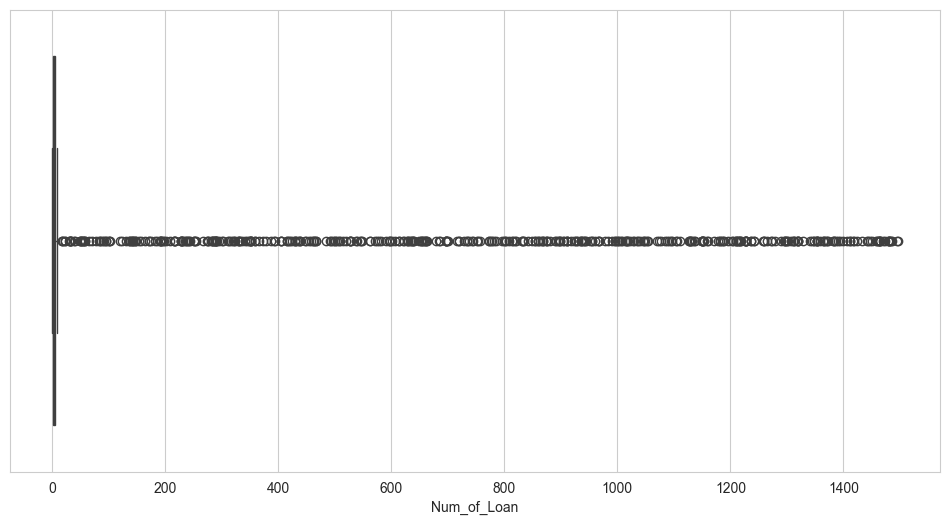

In [32]:
sns.boxplot(data= df, x = df.Num_of_Loan);


In [33]:
non_numeric_values(df, 'Delay_from_due_date')


{'-'}

In [34]:
df[df['Delay_from_due_date'] < 0]['Delay_from_due_date'].unique()  # not possible


array([-1, -2, -3, -5, -4])

In [35]:
df['Num_of_Loan'].nunique()


398

In [36]:
df[df['Delay_from_due_date'] < 0]['Delay_from_due_date'].count()


np.int64(547)

In [37]:
df.drop(df[df['Delay_from_due_date'] < 0].index, inplace=True)
df.shape

(92886, 20)

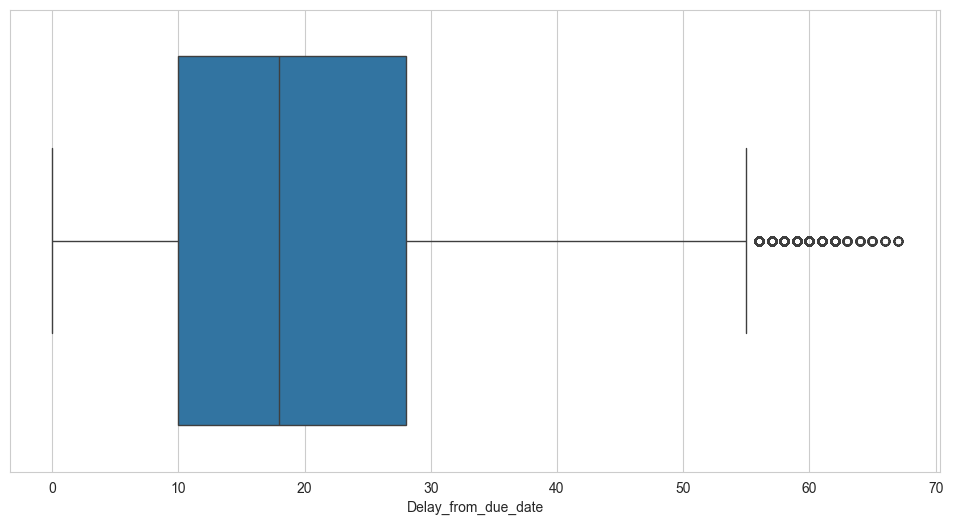

In [38]:
sns.boxplot(data= df, x = df.Delay_from_due_date);


In [39]:
non_numeric_values(df, 'Num_of_Delayed_Payment')


{'-', 'nan'}

In [40]:
df['Num_of_Delayed_Payment'] = pd.to_numeric(df['Num_of_Delayed_Payment'], errors='coerce')
df[df['Num_of_Delayed_Payment'] < 0]['Num_of_Delayed_Payment'].unique()

array([-1., -3., -2.])

In [41]:
df[df['Num_of_Delayed_Payment'] < 0]['Num_of_Delayed_Payment'].count()

np.int64(592)

In [42]:
df.drop(df[df['Num_of_Delayed_Payment'] < 0].index, inplace=True)
df.shape

(92294, 20)

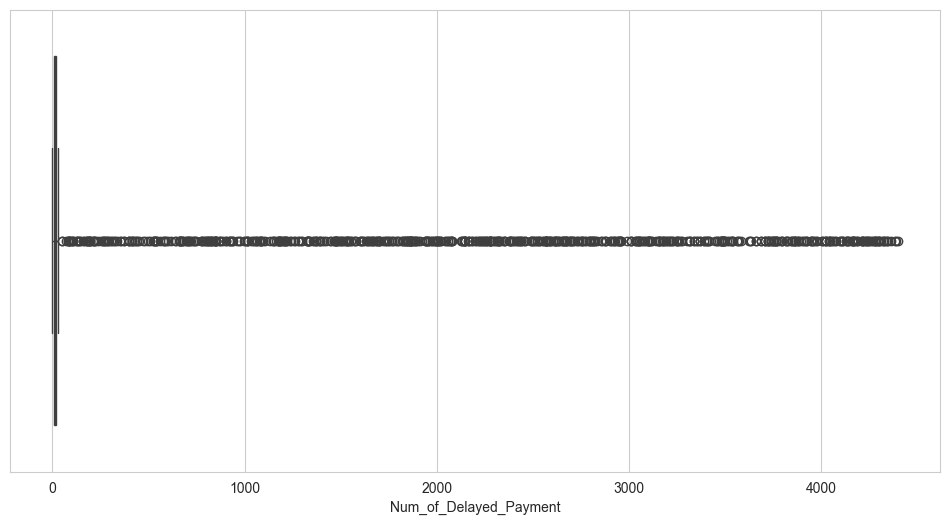

In [43]:
sns.boxplot(data= df, x = df['Num_of_Delayed_Payment'].dropna());

In [53]:
from sklearn.impute import KNNImputer

def knn_impute_column(df, column_name, n_neighbors=5):
    """
    Fill missing values in a specific column using KNN imputation.

    Parameters:
    df (DataFrame): The DataFrame containing the column to be imputed.
    column_name (str): The name of the column to be imputed.
    n_neighbors (int): Number of neighbors to consider for imputation. Default is 5.

    Returns:
    DataFrame: The DataFrame with missing values in the specified column imputed.
    """

    # Extract the column to be imputed
    column_to_impute = df[[column_name]]

    # Create an instance of the KNNImputer class
    imputer = KNNImputer(n_neighbors=n_neighbors)

    # Fit and transform the imputer to fill missing values in the column
    column_imputed = imputer.fit_transform(column_to_impute)

    # Replace the original column with the imputed values
    df[column_name] = column_imputed

    return df

In [54]:
df = knn_impute_column(df, 'Num_of_Delayed_Payment')

In [45]:
df['Num_of_Delayed_Payment'].isna().sum()


np.int64(6490)

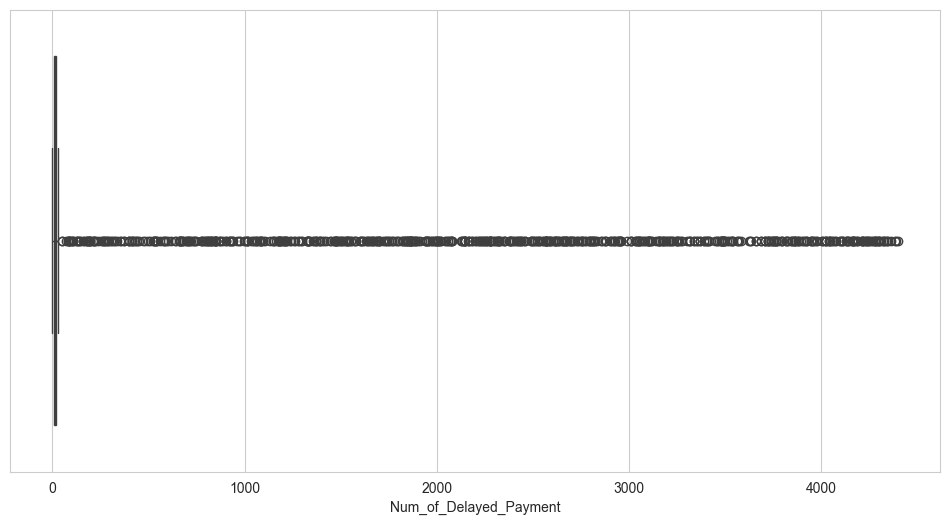

In [46]:
sns.boxplot(data= df, x = df['Num_of_Delayed_Payment']);


In [47]:
non_numeric_values(df, 'Num_Credit_Inquiries')


{'.', 'nan'}

In [48]:
df[df['Num_Credit_Inquiries'] < 0]['Num_Credit_Inquiries'].unique()


array([], dtype=float64)

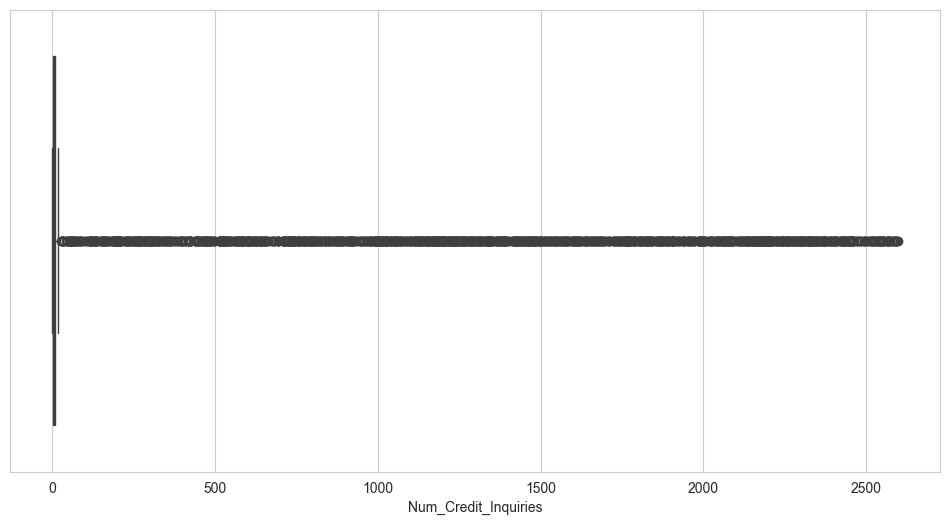

In [49]:
sns.boxplot(data= df, x = df['Num_Credit_Inquiries'].dropna());


In [50]:
df['Num_Credit_Inquiries'].isna().sum()


np.int64(1810)

In [51]:
df['Num_Credit_Inquiries'].nunique()


1160

In [52]:
df['Num_Credit_Inquiries'].value_counts().head(10)


Num_Credit_Inquiries
4.000    10314
3.000     8103
6.000     7560
7.000     7516
8.000     7311
2.000     7290
1.000     6889
0.000     6364
5.000     5277
9.000     4932
Name: count, dtype: int64

In [55]:
df = knn_impute_column(df, 'Num_Credit_Inquiries')
df['Num_Credit_Inquiries'].isna().sum()

np.int64(0)

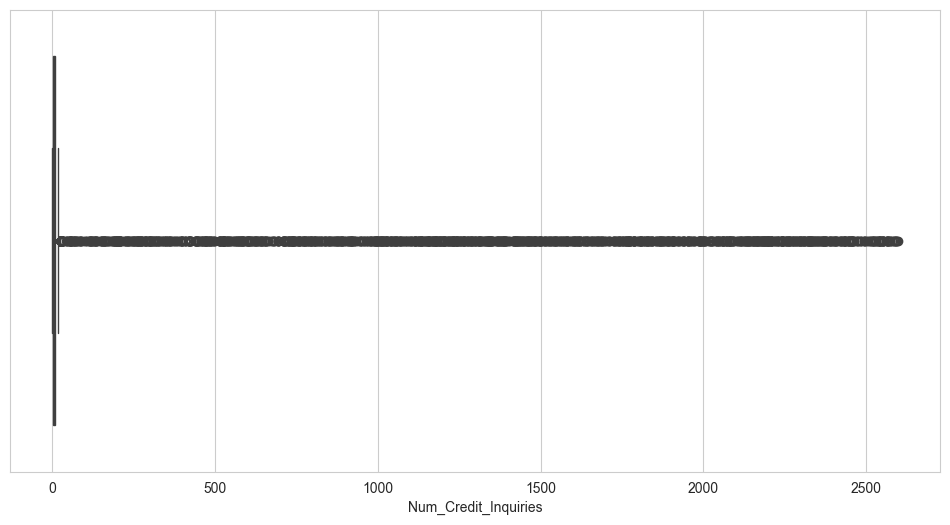

In [56]:
sns.boxplot(data= df, x = df['Num_Credit_Inquiries']);


In [57]:
df.Credit_Mix.value_counts()

Credit_Mix
Standard    34131
Good        21741
Bad         17755
Name: count, dtype: int64

In [58]:
df.Credit_Mix.isna().sum()


np.int64(18667)

In [59]:
# Fill null values in 'Credit_Mix' with 'Unknown'
df['Credit_Mix'].fillna('Unknown', inplace=True)

df['Credit_Mix'].astype('object')

0        Unknown
3           Good
4           Good
5           Good
6           Good
          ...   
99995    Unknown
99996    Unknown
99997       Good
99998       Good
99999       Good
Name: Credit_Mix, Length: 92294, dtype: object

In [60]:
df.Credit_Mix.value_counts()


Credit_Mix
Standard    34131
Good        21741
Unknown     18667
Bad         17755
Name: count, dtype: int64

In [61]:
df['Credit_History_Age'].value_counts()


Credit_History_Age
15 Years and 11 Months    414
19 Years and 5 Months     408
19 Years and 3 Months     407
17 Years and 9 Months     407
19 Years and 4 Months     406
                         ... 
0 Years and 3 Months       19
33 Years and 7 Months      14
0 Years and 2 Months       13
33 Years and 8 Months      10
0 Years and 1 Months        1
Name: count, Length: 404, dtype: int64

In [62]:
df['Credit_History_Age'].isna().sum()


np.int64(8356)

In [63]:
# Group by 'Credit_Mix' and calculate mode for 'Credit_History_Age' within each group
mode_by_credit_mix = df.groupby('Credit_Mix')['Credit_History_Age'].transform(lambda x: x.mode()[0])

# Fill NaN values in 'Credit_History_Age' with the mode for each group
df['Credit_History_Age'].fillna(mode_by_credit_mix, inplace=True)

In [64]:
df['Credit_History_Age'].isna().sum()


np.int64(0)

In [65]:
df['Credit_History_Age'].value_counts()


Credit_History_Age
19 Years and 5 Months     3525
30 Years and 2 Months     2203
15 Years and 9 Months     2102
8 Years and 10 Months     1828
15 Years and 11 Months     414
                          ... 
0 Years and 3 Months        19
33 Years and 7 Months       14
0 Years and 2 Months        13
33 Years and 8 Months       10
0 Years and 1 Months         1
Name: count, Length: 404, dtype: int64

In [66]:
# Extract years and months from 'Credit_History_Age' column
df['Credit_History_Years'] = df['Credit_History_Age'].str.extract(r'(\d+) Years').astype(int)
df['Credit_History_Months'] = df['Credit_History_Age'].str.extract(r'(\d+) Months').astype(int)

df.drop(columns=['Credit_History_Age'], inplace=True)

df.head()

Age Occupation Annual_Income  Num_Bank_Accounts  Num_Credit_Card  \
0   23  Scientist      19114.12                  3                4   
3   23  Scientist      19114.12                  3                4   
4   23  Scientist      19114.12                  3                4   
5   23  Scientist      19114.12                  3                4   
6   23  Scientist      19114.12                  3                4   

   Interest_Rate  Num_of_Loan  Delay_from_due_date  Num_of_Delayed_Payment  \
0              3            4                    3                   7.000   
3              3            4                    5                   4.000   
4              3            4                    6                  31.203   
5              3            4                    8                   4.000   
6              3            4                    3                   8.000   

   Num_Credit_Inquiries  ... Outstanding_Debt Credit_Utilization_Ratio  \
0                 4.000  ...           809.98                   26.823   
3                 4.000  ...           809.98                   31.378   
4                 4.000  ...           809.98                   24.797   
5                 4.000  ...           809.98                   27.262   
6                 4.000  ...           809.98                   22.538   

   Payment_of_Min_Amount Total_EMI_per_month  Amount_invested_monthly  \
0                     No              49.575        80.41529543900253   
3                     No              49.575        199.4580743910713   
4                     No              49.575       41.420153086217326   
5                     No              49.575       62.430172331195294   
6                     No              49.575        178.3440674122349   

              Payment_Behaviour     Monthly_Balance Credit_Score  \
0   HighspentSmallvaluepayments  312.49408867943663            2   
3    LowspentSmallvaluepayments  223.45130972736786            2   
4  HighspentMediumvaluepayments  341.48923103222177            2   
5                        !@9#%8   340.4792117872438            2   
6    LowspentSmallvaluepayments   244.5653167062043            2   

   Credit_History_Years  Credit_History_Months  
0                    22                      1  
3                    22                      4  
4                    22                      5  
5                    22                      6  
6                    22                      7  

[5 rows x 21 columns]

In [67]:
# Convert years to months and add with months to get total months
df['Credit_History_Age_Months'] = df['Credit_History_Years'] * 12 + df['Credit_History_Months']

# Drop the 'Credit_History_Years' and 'Credit_History_Months' columns
df.drop(columns=['Credit_History_Years', 'Credit_History_Months'], inplace=True)

df.head()

Age Occupation Annual_Income  Num_Bank_Accounts  Num_Credit_Card  \
0   23  Scientist      19114.12                  3                4   
3   23  Scientist      19114.12                  3                4   
4   23  Scientist      19114.12                  3                4   
5   23  Scientist      19114.12                  3                4   
6   23  Scientist      19114.12                  3                4   

   Interest_Rate  Num_of_Loan  Delay_from_due_date  Num_of_Delayed_Payment  \
0              3            4                    3                   7.000   
3              3            4                    5                   4.000   
4              3            4                    6                  31.203   
5              3            4                    8                   4.000   
6              3            4                    3                   8.000   

   Num_Credit_Inquiries Credit_Mix Outstanding_Debt  Credit_Utilization_Ratio  \
0                 4.000    Unknown           809.98                    26.823   
3                 4.000       Good           809.98                    31.378   
4                 4.000       Good           809.98                    24.797   
5                 4.000       Good           809.98                    27.262   
6                 4.000       Good           809.98                    22.538   

  Payment_of_Min_Amount  Total_EMI_per_month Amount_invested_monthly  \
0                    No               49.575       80.41529543900253   
3                    No               49.575       199.4580743910713   
4                    No               49.575      41.420153086217326   
5                    No               49.575      62.430172331195294   
6                    No               49.575       178.3440674122349   

              Payment_Behaviour     Monthly_Balance  Credit_Score  \
0   HighspentSmallvaluepayments  312.49408867943663             2   
3    LowspentSmallvaluepayments  223.45130972736786             2   
4  HighspentMediumvaluepayments  341.48923103222177             2   
5                        !@9#%8   340.4792117872438             2   
6    LowspentSmallvaluepayments   244.5653167062043             2   

   Credit_History_Age_Months  
0                        265  
3                        268  
4                        269  
5                        270  
6                        271

In [68]:
df.Payment_of_Min_Amount.value_counts()


Payment_of_Min_Amount
Yes    48966
No     32262
NM     11066
Name: count, dtype: int64

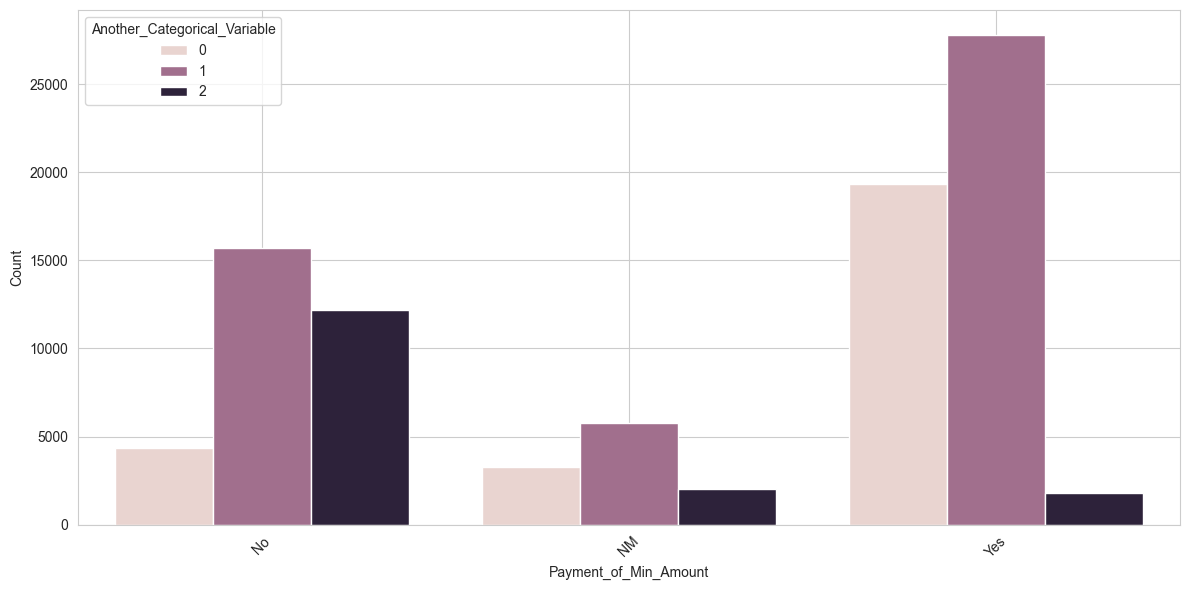

In [69]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Payment_of_Min_Amount', hue='Credit_Score', data=df)
plt.xlabel('Payment_of_Min_Amount')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Another_Categorical_Variable')
plt.grid(True)
plt.tight_layout()
plt.show()

In [70]:
df.Amount_invested_monthly.nunique()


84073

In [71]:
non_numeric_values(df, 'Amount_invested_monthly')


{'.', 'nan'}

In [72]:
df['Amount_invested_monthly'] = pd.to_numeric(df['Amount_invested_monthly'], errors='coerce')
df[df['Amount_invested_monthly'] < 0]['Amount_invested_monthly'].unique()

array([], dtype=float64)

In [73]:
df.Amount_invested_monthly.value_counts().head(15)

Amount_invested_monthly
10000.000    3941
0.000         154
167.164         1
80.415          1
199.458         1
41.420          1
62.430          1
178.344         1
24.785          1
104.292         1
42.936          1
43.371          1
148.275         1
76.283          1
213.978         1
Name: count, dtype: int64

In [74]:
df[df.Amount_invested_monthly.isna()].sample(15)


Age  Occupation       Annual_Income  Num_Bank_Accounts  \
47014   25       Other            37346.16                  0   
98429   40  Accountant            40878.85                  0   
79443   41      Writer            90285.33                  1   
37427   29   Scientist            85486.14                  7   
60133   53   Architect  100555.86000000002                  6   
25602   35      Lawyer             82277.8                  8   
39327   41     Teacher  130435.86000000002                  4   
82901   45       Other          19513928.0                  6   
68748   27      Writer             69289.4                  8   
84695   37       Other           14996.235                  3   
96285   22    Musician            19028.33                  1   
89834   48  Accountant            30807.57               1284   
65521   42       Other            53467.47                  9   
69831   39  Journalist            17698.23                  6   
71571   42    Engineer            16574.41                  7   

       Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
47014                5              7            1                   11   
98429                5             11            4                    6   
79443                4             11            3                    6   
37427                5             13            3                   24   
60133                6              5            0                   14   
25602                9             32            7                   60   
39327              846              9            2                   13   
82901                8             30            2                   29   
68748                4             15            2                    8   
84695                6             16            5                   25   
96285                7             12            0                    3   
89834                5              4            4                    7   
65521                9             17            7                   60   
69831                9             18            7                   31   
71571                5             11            7                   13   

       Num_of_Delayed_Payment  Num_Credit_Inquiries Credit_Mix  \
47014                   8.000                 1.000       Good   
98429                   9.000                 8.000       Good   
79443                   3.000                 2.000       Good   
37427                   6.000                 3.000   Standard   
60133                  10.000                 2.000    Unknown   
25602                  17.000                 7.000    Unknown   
39327                   1.000                 0.000       Good   
82901                  21.000                 7.000        Bad   
68748                  10.000              1230.000    Unknown   
84695                  18.000                27.843   Standard   
96285                   2.000                 4.000       Good   
89834                   6.000                 3.000    Unknown   
65521                  18.000                 9.000        Bad   
69831                  22.000                14.000        Bad   
71571                  16.000                 8.000   Standard   

      Outstanding_Debt  Credit_Utilization_Ratio Payment_of_Min_Amount  \
47014          1276.04                    35.570                    NM   
98429          1360.31                    31.220                    No   
79443           570.82                    33.713                    NM   
37427           380.26                    40.005                   Yes   
60133           552.69                    24.921                    No   
25602          2748.82                    31.907                   Yes   
39327           942.71                    34.785                    NM   
82901          2496.64                    28.250                   Yes   
68748          2424.83                    

In [75]:
df = knn_impute_column(df, 'Amount_invested_monthly')


In [76]:
df.Amount_invested_monthly.isna().sum()


np.int64(0)

In [77]:
df.Amount_invested_monthly.value_counts().head(10)


Amount_invested_monthly
633.430      4128
10000.000    3941
0.000         154
199.458         1
41.420          1
62.430          1
178.344         1
24.785          1
104.292         1
40.391          1
Name: count, dtype: int64

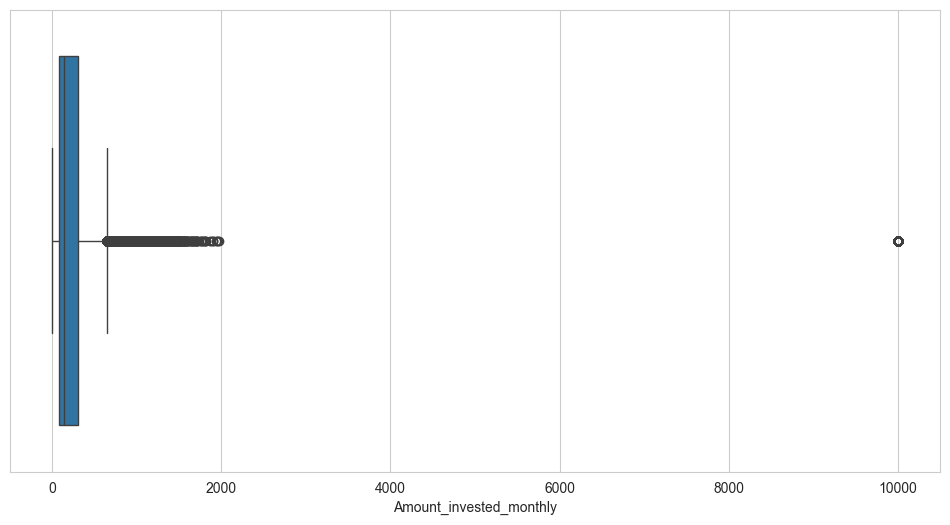

In [78]:
sns.boxplot(data= df, x = df['Amount_invested_monthly']);


In [79]:
df[df['Amount_invested_monthly'] == 10000]['Amount_invested_monthly'].count()


np.int64(3941)

In [80]:
df.Payment_Behaviour.value_counts()


Payment_Behaviour
LowspentSmallvaluepayments      23661
HighspentMediumvaluepayments    16179
LowspentMediumvaluepayments     12777
HighspentLargevaluepayments     12569
HighspentSmallvaluepayments     10468
LowspentLargevaluepayments       9646
!@9#%8                           6994
Name: count, dtype: int64

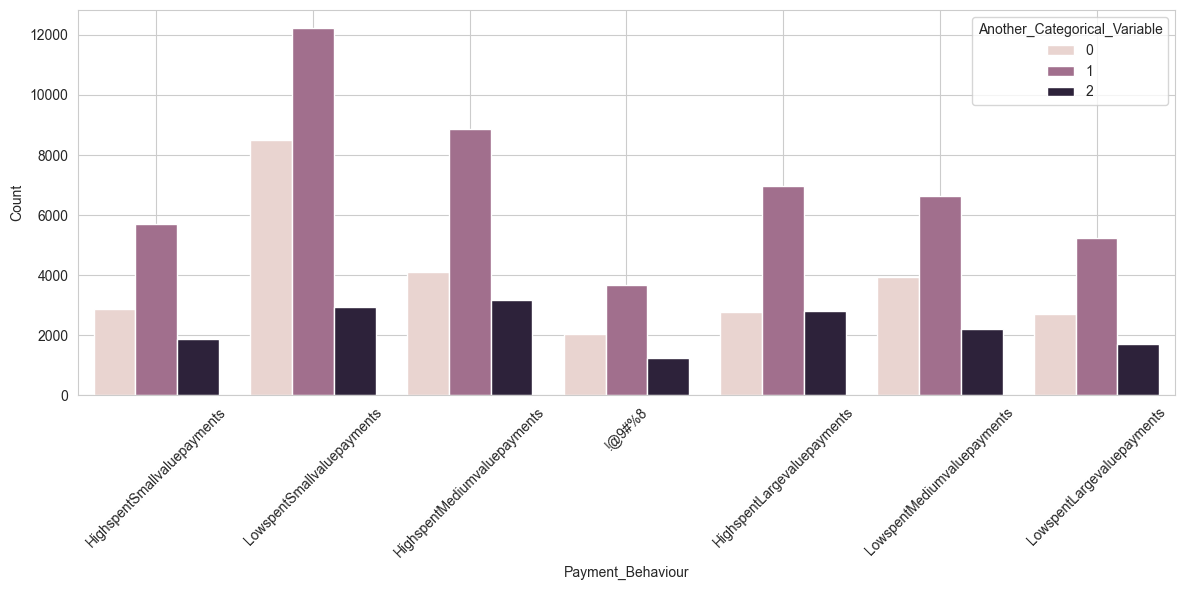

In [81]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Payment_Behaviour', hue='Credit_Score', data=df)
plt.xlabel('Payment_Behaviour')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Another_Categorical_Variable')
plt.grid(True)
plt.tight_layout()
plt.show()

In [82]:
# Replace '!@9#%8' with NaN
df['Payment_Behaviour'].replace('!@9#%8', pd.NA, inplace=True)

# Impute missing values with mode
mode_value = df['Payment_Behaviour'].mode()[0]
df['Payment_Behaviour'].fillna(mode_value, inplace=True)

In [83]:
df.Payment_Behaviour.value_counts()


Payment_Behaviour
LowspentSmallvaluepayments      30655
HighspentMediumvaluepayments    16179
LowspentMediumvaluepayments     12777
HighspentLargevaluepayments     12569
HighspentSmallvaluepayments     10468
LowspentLargevaluepayments       9646
Name: count, dtype: int64

In [84]:
df['Payment_Behaviour'] = df['Payment_Behaviour'].str.replace('Lowspent', 'Low_spent_')
df['Payment_Behaviour'] = df['Payment_Behaviour'].str.replace('Highspent', 'High_spent_')
df['Payment_Behaviour'] = df['Payment_Behaviour'].str.replace('Highspent', 'High_spent_')

df['Payment_Behaviour'] = df['Payment_Behaviour'].str.replace('Smallvalue', 'Small_value_')
df['Payment_Behaviour'] = df['Payment_Behaviour'].str.replace('Largevalue', 'Large_value_')
df['Payment_Behaviour'] = df['Payment_Behaviour'].str.replace('Mediumvalue', 'Medium_value_')

df['Payment_Behaviour'].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      30655
High_spent_Medium_value_payments    16179
Low_spent_Medium_value_payments     12777
High_spent_Large_value_payments     12569
High_spent_Small_value_payments     10468
Low_spent_Large_value_payments       9646
Name: count, dtype: int64

In [85]:
df.Monthly_Balance.isna().sum()


np.int64(1123)

In [86]:
non_numeric_values(df, 'Monthly_Balance')


{'-', '.', 'nan'}

In [87]:
df['Monthly_Balance'] = pd.to_numeric(df['Monthly_Balance'], errors='coerce')
df[df['Monthly_Balance'] < 0]['Monthly_Balance'].count()

np.int64(9)

In [88]:
df.drop(df[df['Monthly_Balance'] < 0].index, inplace = True)

In [89]:
df['Monthly_Balance'].value_counts().head(15)


Monthly_Balance
393.674    1
312.494    1
223.451    1
341.489    1
340.479    1
244.565    1
358.124    1
470.691    1
484.591    1
465.676    1
412.669    1
368.155    1
396.997    1
300.008    1
379.538    1
Name: count, dtype: int64

In [90]:
df = knn_impute_column(df, 'Monthly_Balance')
df.Monthly_Balance.isna().sum()

np.int64(0)

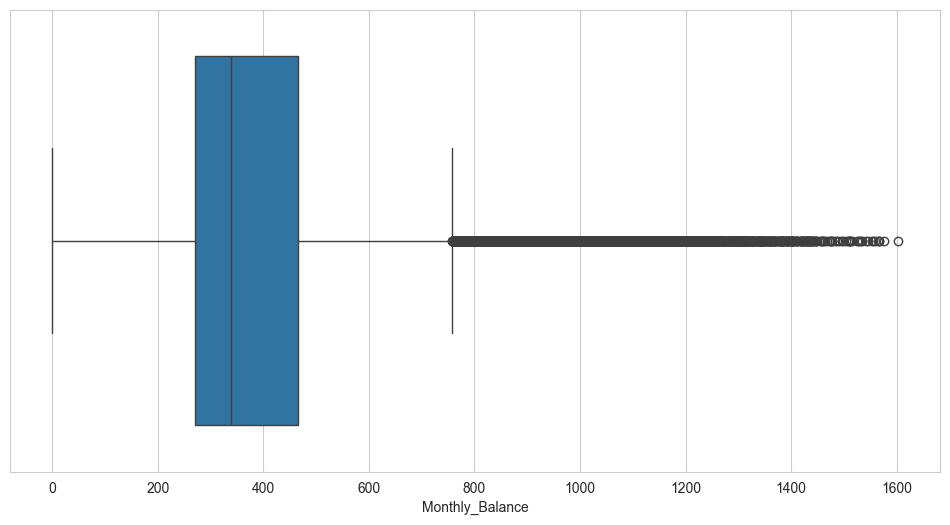

In [91]:
sns.boxplot(df, x= df['Monthly_Balance']);


In [92]:
# lastly change wrong dtypes..
df['Annual_Income'] = df['Annual_Income'].astype(float)
df['Outstanding_Debt'] = df['Outstanding_Debt'].astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92285 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        92285 non-null  int64  
 1   Occupation                 92285 non-null  object 
 2   Annual_Income              92285 non-null  float64
 3   Num_Bank_Accounts          92285 non-null  int64  
 4   Num_Credit_Card            92285 non-null  int64  
 5   Interest_Rate              92285 non-null  int64  
 6   Num_of_Loan                92285 non-null  int64  
 7   Delay_from_due_date        92285 non-null  int64  
 8   Num_of_Delayed_Payment     92285 non-null  float64
 9   Num_Credit_Inquiries       92285 non-null  float64
 10  Credit_Mix                 92285 non-null  object 
 11  Outstanding_Debt           92285 non-null  float64
 12  Credit_Utilization_Ratio   92285 non-null  float64
 13  Payment_of_Min_Amount      92285 non-null  object 


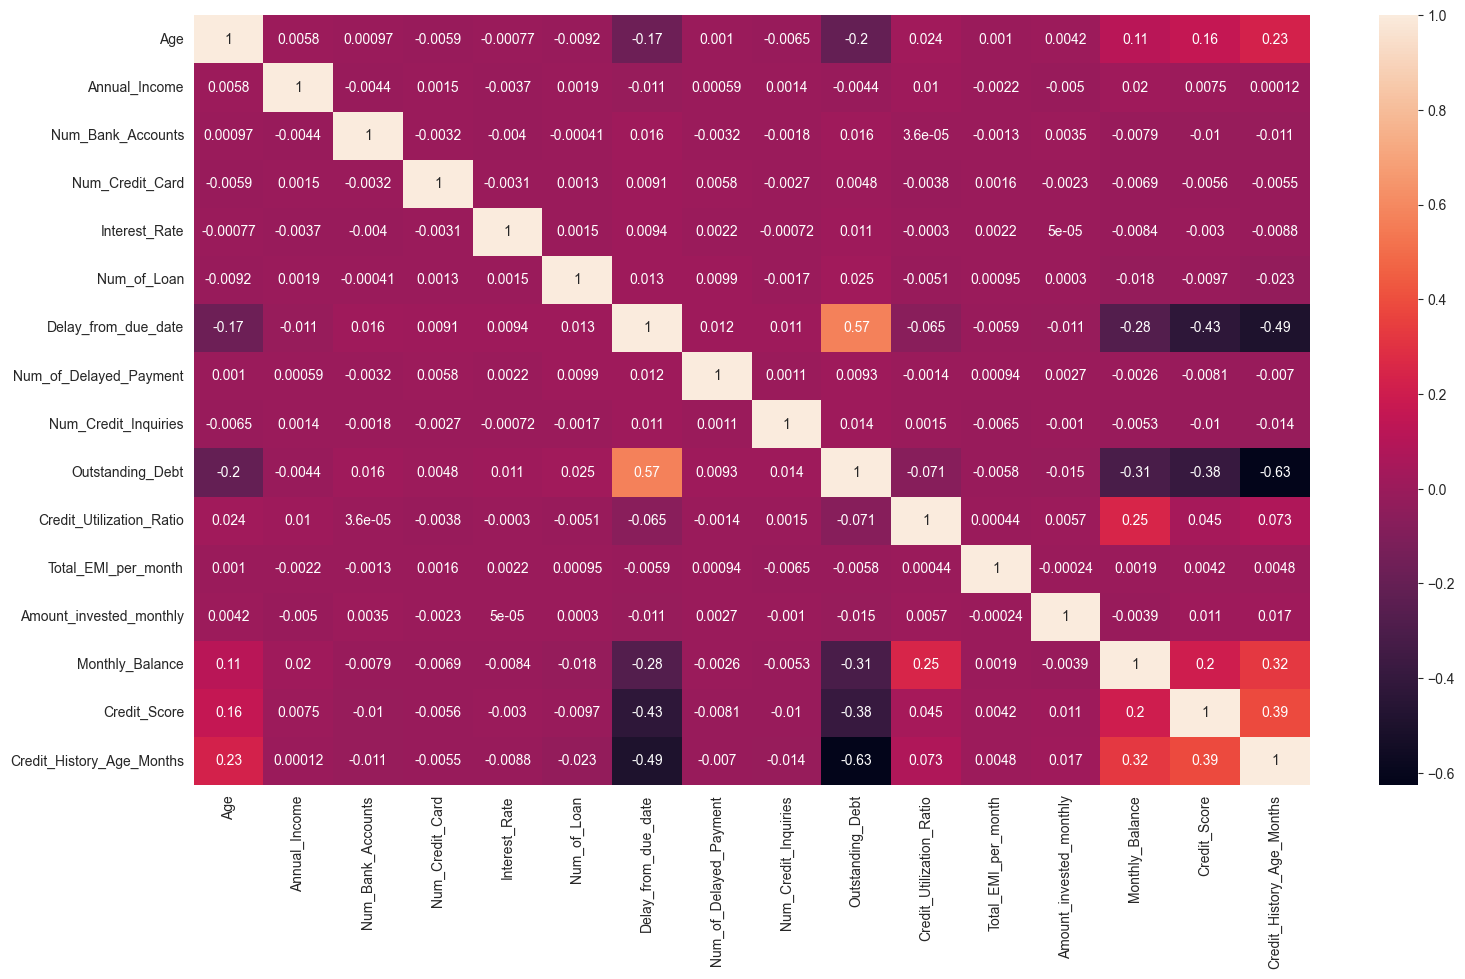

In [ ]:
plt.figure(figsize=(18, 10))
sns.heatmap(df.select_dtypes(include='number').corr(), annot = True);

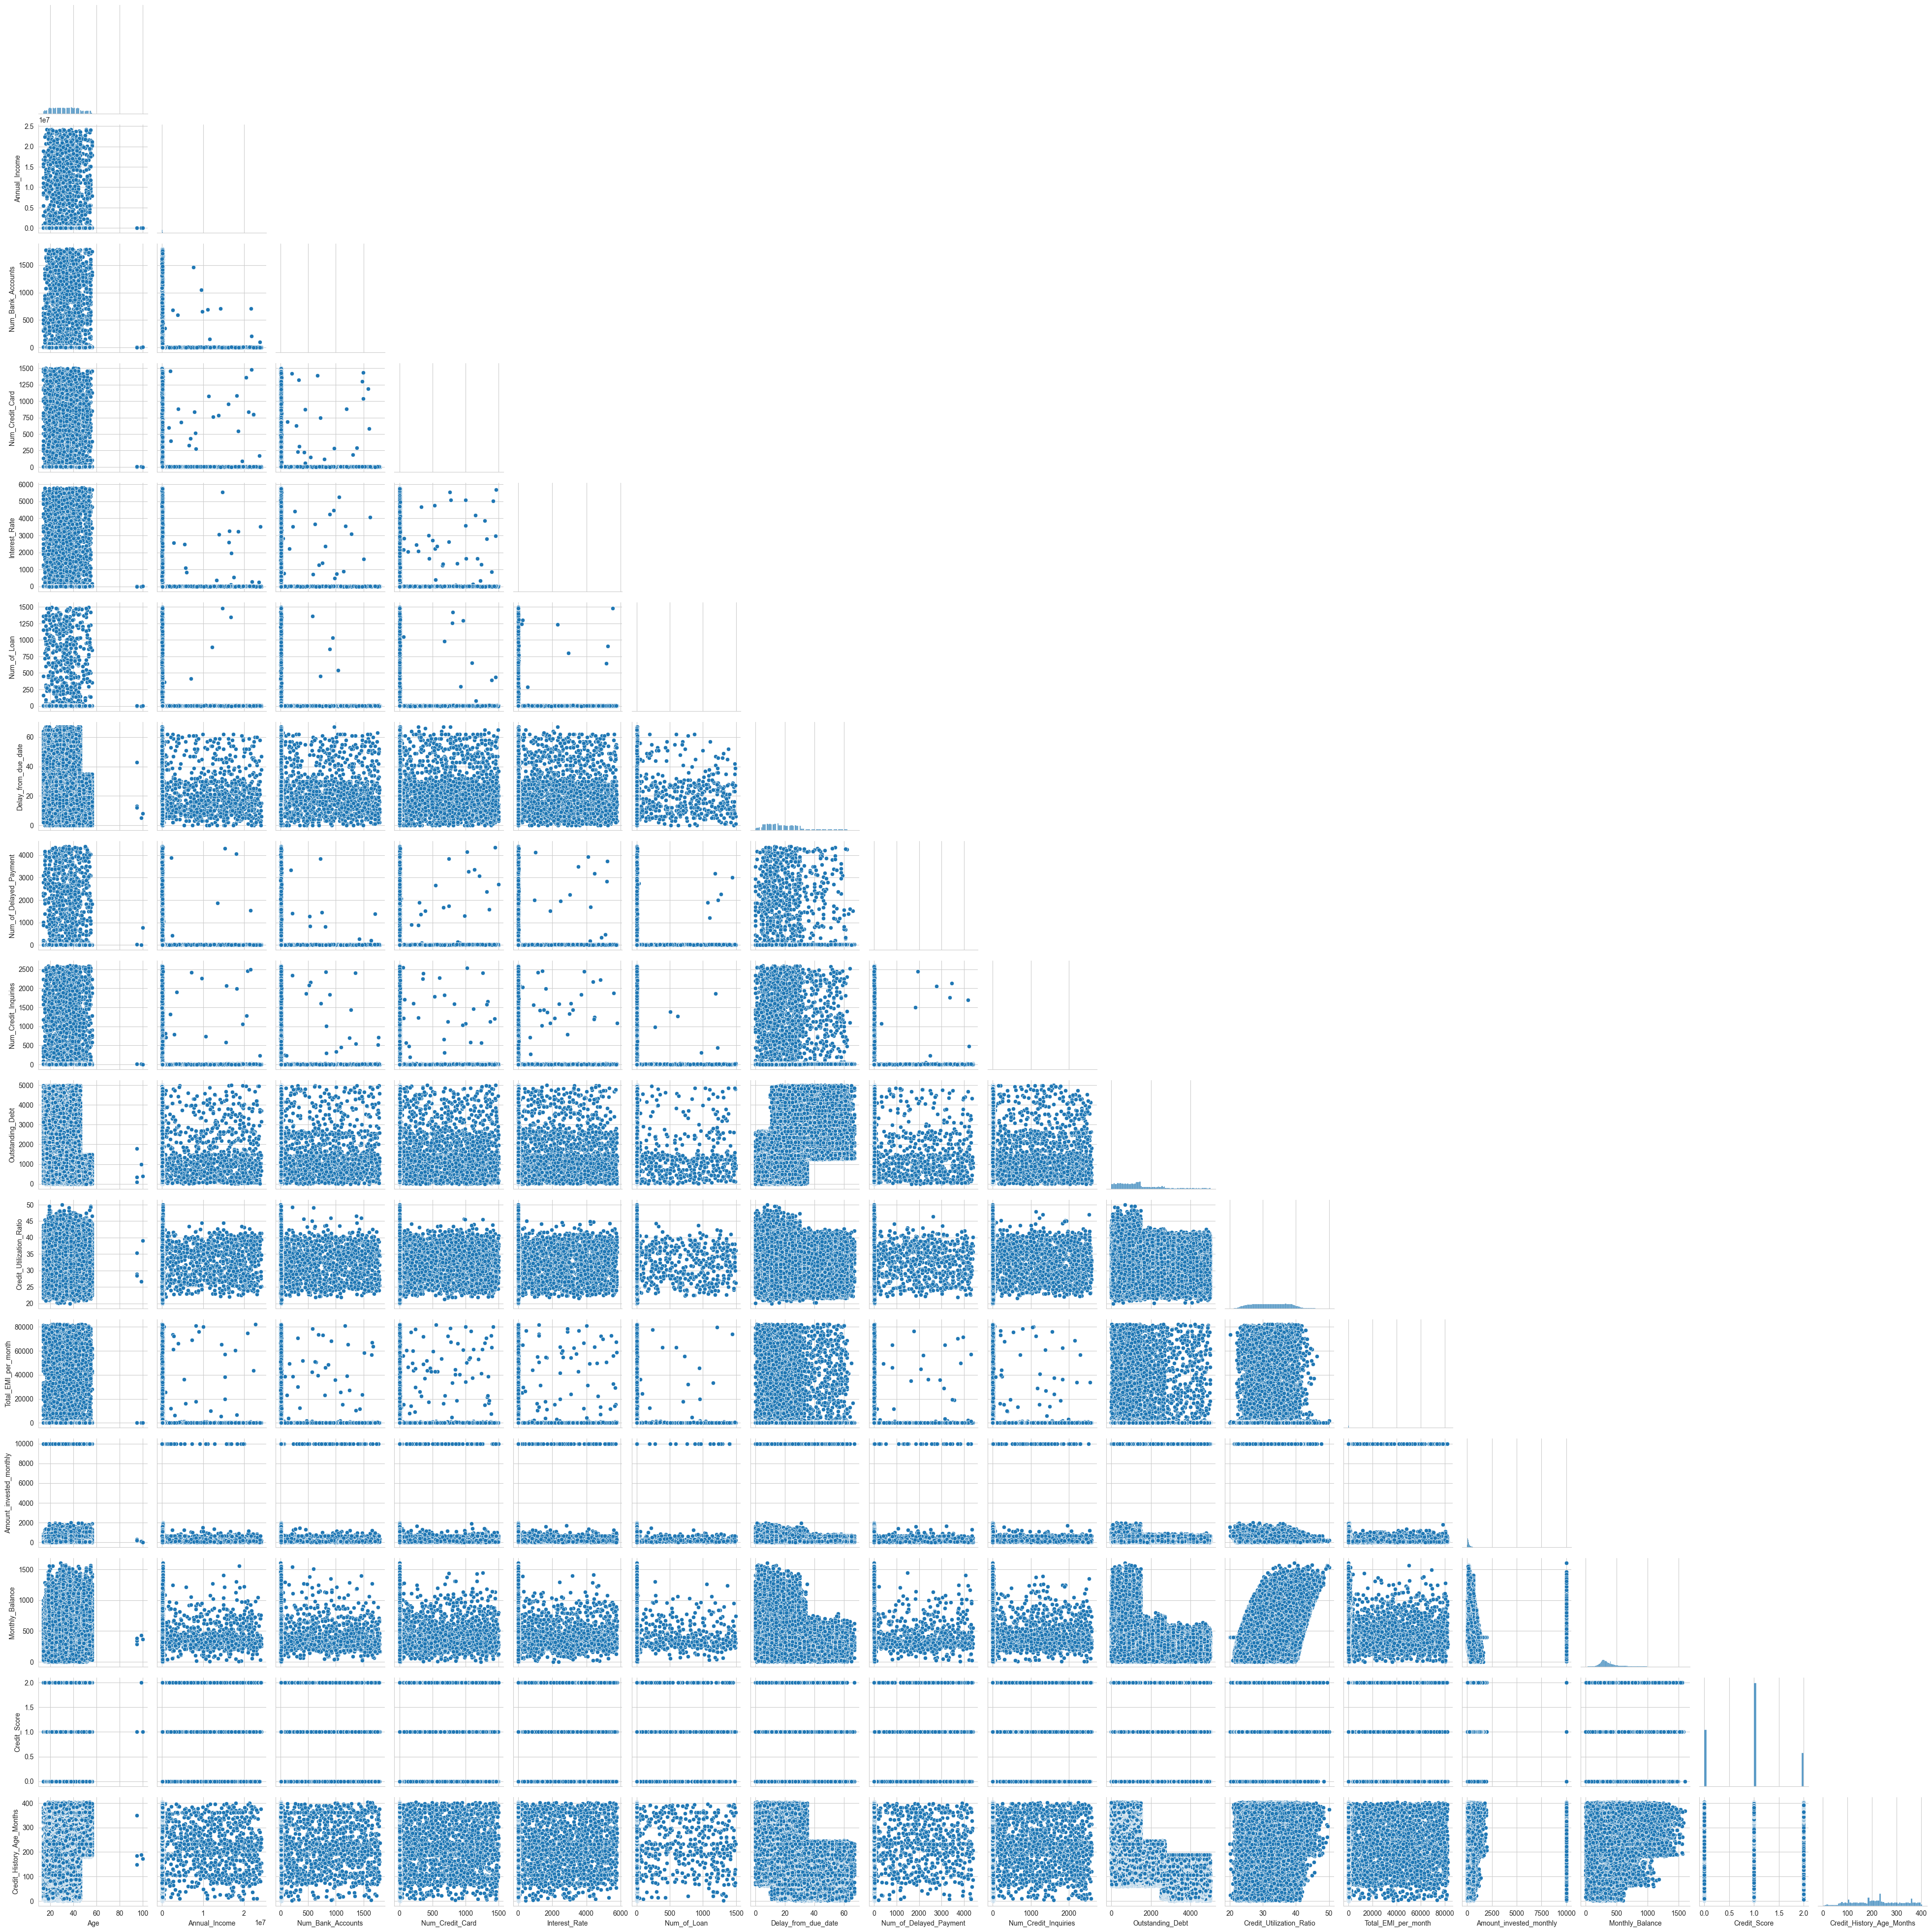

In [94]:
sns.pairplot(df, corner=True);
